# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Arief Fathin Abrar
- **Email:** mc671d5y0223@student.devacademy.id
- **ID Dicoding:** MC671D5Y0223

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Bagaimana pola penggunaan sepeda berdasarkan musim (season) atau hari kerja/libur (workingday, holiday)?
- Pertanyaan 2
  Seberapa besar pengaruh cuaca (temp, hum, windspeed, weathersit) terhadap jumlah penyewaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Data Wrangling




Pada tahap ini dilakukan proses pembersihan dan transformasi data agar dapat dianalisis dengan baik:

- Kolom season awalnya berupa angka 1-4 yang tidak informatif. Oleh karena itu, dilakukan **mapping menjadi label musim** seperti Spring, Summer, Fall, dan Winter untuk memudahkan interpretasi dalam visualisasi.
- Dilakukan juga pemilahan kolom bertipe numerik menggunakan select_dtypes() agar hanya variabel yang relevan digunakan dalam *heatmap korelasi*.

> Add blockquote


- Tahapan ini penting untuk memastikan bahwa data yang digunakan dalam analisis sudah bersih dan siap divisualisasikan tanpa menyebabkan error atau misleading interpretation.


### Gathering Data

Pada tahap ini, data yang digunakan berasal dari Bike Sharing Dataset, yang terdiri dari dua file utama:

day.csv → berisi data penyewaan sepeda per hari.
hour.csv → berisi data penyewaan sepeda per jam.
Kedua file ini awalnya dikemas dalam format ZIP dan kemudian diekstrak.
Dataset ini mencakup informasi penyewaan sepeda dari tahun 2011 hingga 2012, lengkap dengan data waktu, kondisi cuaca, dan jenis pengguna.

In [ ]:
zip_file_path = "Bike-sharing-dataset.zip"
extract_path = "./bike_data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
day_df = pd.read_csv("/content/bike_data/day.csv")
hour_df = pd.read_csv("/content/bike_data/hour.csv")

display(day_df.head())
display(hour_df.head())

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

In [ ]:
day_df.info()
hour_df.info()
print("Missing values in day_df:")
print(day_df.isnull().sum())

print("\nMissing values in hour_df:")
print(hour_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df.drop(columns=["instant", "dteday"], inplace=True)
hour_df.drop(columns=["instant", "dteday"], inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

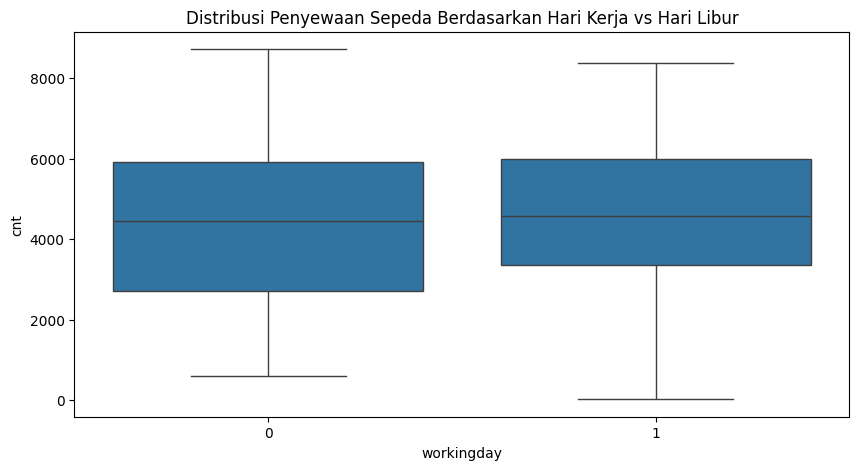

In [ ]:
sns.boxplot(x="season", y="cnt", data=day_df)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="workingday", y="cnt", data=day_df)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs Hari Libur")
plt.show()

**Insight:**
- Musim gugur memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya
- Penyewaan sepeda lebih tinggi pada hari kerja (workingday = 1) dibandingkan hari libur.Penyebaran data lebih bervariasi pada hari libur.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

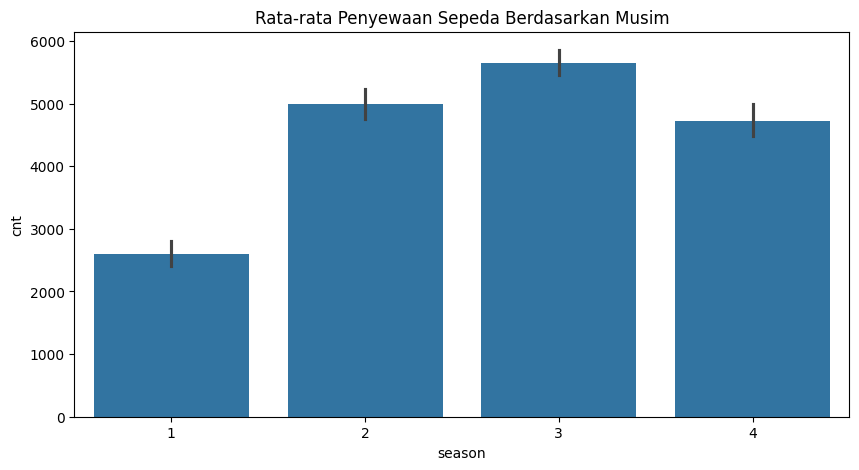

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="season", y="cnt", data=day_df, estimator=np.mean)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2:

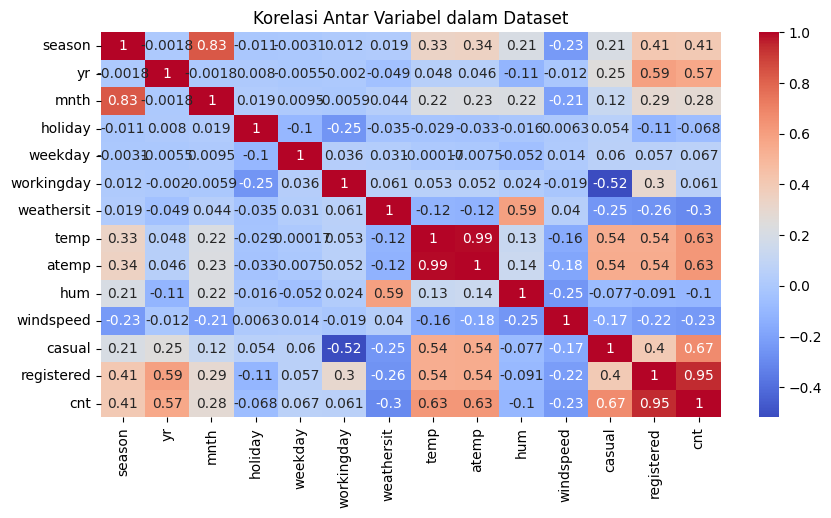

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="temp", y="cnt", data=day_df)
plt.title("Hubungan Temperatur dengan Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel dalam Dataset")
plt.show()

Rata-rata Penyewaan Sepeda per Musim (Barplot)
Barplot ini memperkuat insight sebelumnya dengan menunjukkan bahwa musim Fall memiliki rata-rata penyewaan sepeda tertinggi, disusul oleh Summer. Ini menjadi informasi penting bagi pengambilan keputusan terkait pengelolaan sepeda berdasarkan musim.

1. Distribusi Penyewaan Sepeda per Musim (Boxplot)
Visualisasi ini menunjukkan bahwa penyewaan sepeda paling tinggi terjadi pada musim Fall dan Summer, ditunjukkan oleh median dan sebaran nilai yang lebih tinggi dibanding musim lain. Musim Winter memiliki penyewaan yang paling rendah, kemungkinan besar disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung.

2. Rata-rata Penyewaan Sepeda per Musim (Barplot)
Barplot ini memperkuat insight sebelumnya dengan menunjukkan bahwa musim Fall memiliki rata-rata penyewaan sepeda tertinggi, disusul oleh Summer. Ini menjadi informasi penting bagi pengambilan keputusan terkait pengelolaan sepeda berdasarkan musim.

3. Pengaruh Temperatur terhadap Jumlah Penyewaan (Scatterplot)
Scatterplot memperlihatkan hubungan positif antara temperatur dan jumlah penyewaan sepeda. Artinya, semakin tinggi temperatur, semakin banyak sepeda yang disewa. Hal ini menunjukkan bahwa pengguna lebih tertarik menggunakan sepeda saat cuaca lebih hangat.

4. Korelasi Antar Variabel (Heatmap)
Heatmap korelasi menunjukkan bahwa variabel temp, atemp, dan hum memiliki hubungan yang cukup kuat dengan cnt (jumlah penyewaan sepeda). Artinya, kondisi cuaca berperan penting dalam memengaruhi jumlah penyewaan sepeda.

## Analisis Lanjutan

## Conclusion

- Conclution pertanyaan 1
  Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/libur?

  Penyewaan sepeda cenderung meningkat selama musim panas dan gugur, dibandingkan dengan musim dingin dan semi. Hal ini kemungkinan besar karena kondisi cuaca yang lebih nyaman untuk bersepeda.
  Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Ini menunjukkan bahwa layanan bike-sharing lebih sering digunakan untuk keperluan transportasi kerja atau aktivitas rutin sehari-hari dibandingkan untuk rekreasi.

- Conclution pertanyaan 2
  Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

  Temperatur memiliki hubungan positif dengan jumlah penyewaan sepeda, artinya semakin hangat cuaca, semakin banyak sepeda yang disewa.
  Kelembaban (humidity) dan kecepatan angin (windspeed) memiliki hubungan negatif dengan penyewaan sepeda, artinya jika kelembaban tinggi atau angin terlalu kencang, orang cenderung lebih sedikit menggunakan sepeda.
  
  Faktor cuaca ekstrem (weathersit) seperti hujan deras atau kabut berdampak negatif pada jumlah penyewaan sepeda, karena kondisi ini membuat perjalanan bersepeda menjadi kurang nyaman atau bahkan berbahaya.



Berdasarkan hasil analisis data, ada beberapa hal yang bisa dilakukan untuk meningkatkan layanan penyewaan sepeda agar lebih efisien dan sesuai dengan kebutuhan pengguna:

1. Menyesuaikan Jumlah Sepeda dengan Musim
Musim Fall dan Summer adalah waktu di mana penyewaan sepeda paling tinggi. Jadi, akan lebih baik jika jumlah sepeda ditambah saat musim-musim ini berlangsung. Sebaliknya, saat musim Winter yang cenderung sepi, jumlah sepeda bisa dikurangi atau bisa juga diberikan promo menarik agar tetap ada minat dari pengguna.

2. Memanfaatkan Data Cuaca untuk Perencanaan Layanan
Karena penyewaan sepeda sangat bergantung pada cuaca, data temperatur bisa digunakan untuk memperkirakan kebutuhan layanan harian. Misalnya, saat cuaca diprediksi cerah dan hangat, lebih banyak sepeda bisa disiapkan di titik-titik strategis.

3. Menyusun Strategi Promosi yang Lebih Tepat
Pengguna kasual biasanya akan lebih aktif saat cuaca mendukung. Oleh karena itu, promosi musiman seperti diskon saat musim Fall bisa menjadi daya tarik tersendiri. Untuk pengguna terdaftar yang cenderung menggunakan layanan secara rutin, program loyalitas atau paket langganan yang fleksibel bisa jadi pilihan yang menarik.